In [445]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Description

customer_id : id of the credit card holder

balance_account : balance amount left in the account to make purchases at the end of the 6-month period

purchases_amount : amount of purchases made from account

paid_advance : number of transactions made with “Cash in Advance” method

full_purchases : maximum purchase amount done in full payment

balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

installments : amount of purchases done in installments

purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

cash_advance_frequency : how frequently the cash in advance being paid

nr_cash_advances : cash in advance given by the user

nr_purchases : number of purchase transactions made

credit_limit : limit of credit card for user

fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)

payments : amount of payment done by user

min_payments : minimum amount of payments made by user

full_payment_prc : percent of full payment paid by user

In [446]:
pd.set_option('display.max_columns', None)

### Read the data

In [447]:
df = pd.read_csv('card_transactions.csv')
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [448]:
df.shape

(8500, 18)

In [449]:
df.nunique()

customer_id                         8500
balance_account                     8425
purchases_amount                    5896
paid_advance                        4097
full_purchases                      3826
balance_frequency_update              43
installments                        4240
purchases_frequency                   47
full_purchases_frequency              47
purchases_installments_frequency      47
cash_advance_frequency                54
nr_cash_advances                      63
nr_purchases                         172
credit_limit                         203
fixed_rate_period                      7
payments                            8274
min_payments                        8201
full_payment_prc                      47
dtype: int64

In [450]:
df.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
customer_id                         8500 non-null object
balance_account                     8500 non-null float64
purchases_amount                    8500 non-null float64
paid_advance                        8500 non-null float64
full_purchases                      8500 non-null float64
balance_frequency_update            8500 non-null float64
installments                        8500 non-null float64
purchases_frequency                 8500 non-null float64
full_purchases_frequency            8500 non-null float64
purchases_installments_frequency    8500 non-null float64
cash_advance_frequency              8500 non-null float64
nr_cash_advances                    8500 non-null int64
nr_purchases                        8500 non-null int64
credit_limit                        8499 non-null float64
fixed_rate_period                   8500 non-null int64
payments                      

### Impute the nans

In [452]:
df['credit_limit'].fillna(df['credit_limit'].median(),inplace=True)

df['credit_limit'].count()


df['min_payments'].median()
df['min_payments'].fillna(df['min_payments'].median(),inplace=True)

In [453]:
df.isnull().sum()

customer_id                         0
balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

### Exploring the data

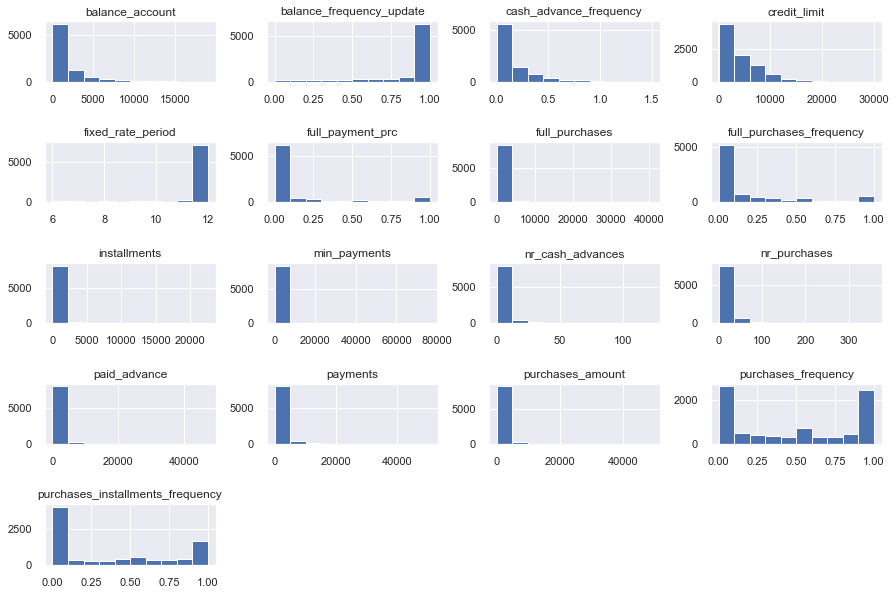

In [454]:
df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=1) 

In [455]:
df["min_payments"].unique()

array([ 89.711672,  82.95518 , 443.781316, ..., 150.500248, 497.408854,
       437.075647])

In [456]:
df.dtypes

customer_id                          object
balance_account                     float64
purchases_amount                    float64
paid_advance                        float64
full_purchases                      float64
balance_frequency_update            float64
installments                        float64
purchases_frequency                 float64
full_purchases_frequency            float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
nr_cash_advances                      int64
nr_purchases                          int64
credit_limit                        float64
fixed_rate_period                     int64
payments                            float64
min_payments                        float64
full_payment_prc                    float64
dtype: object

In [457]:
df.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,1565.941403,999.561312,973.508540,588.165365,0.876272,411.708492,0.489383,0.201940,0.363796,0.135288,3.253647,14.677059,4485.673898,11.516118,1721.250989,846.130177,0.152587
std,2090.513302,2154.189460,2078.539061,1669.466184,0.237517,910.142440,0.401075,0.297756,0.397162,0.200892,6.854883,25.001561,3629.626271,1.339121,2893.200899,2349.256982,0.291505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,6.000000,0.000000,0.019163,0.000000
25%,126.318369,39.000000,0.000000,0.000000,0.875000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,12.000000,381.893717,170.483712,0.000000
50%,869.046468,360.000000,0.000000,37.400000,1.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,12.000000,851.146953,310.399040,0.000000
75%,2053.674410,1105.897500,1113.726110,570.410000,1.000000,466.725000,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,12.000000,1897.014052,787.173152,0.142857
max,19043.138560,49039.570000,47137.211760,40761.250000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,12.000000,50721.483360,76406.207520,1.000000


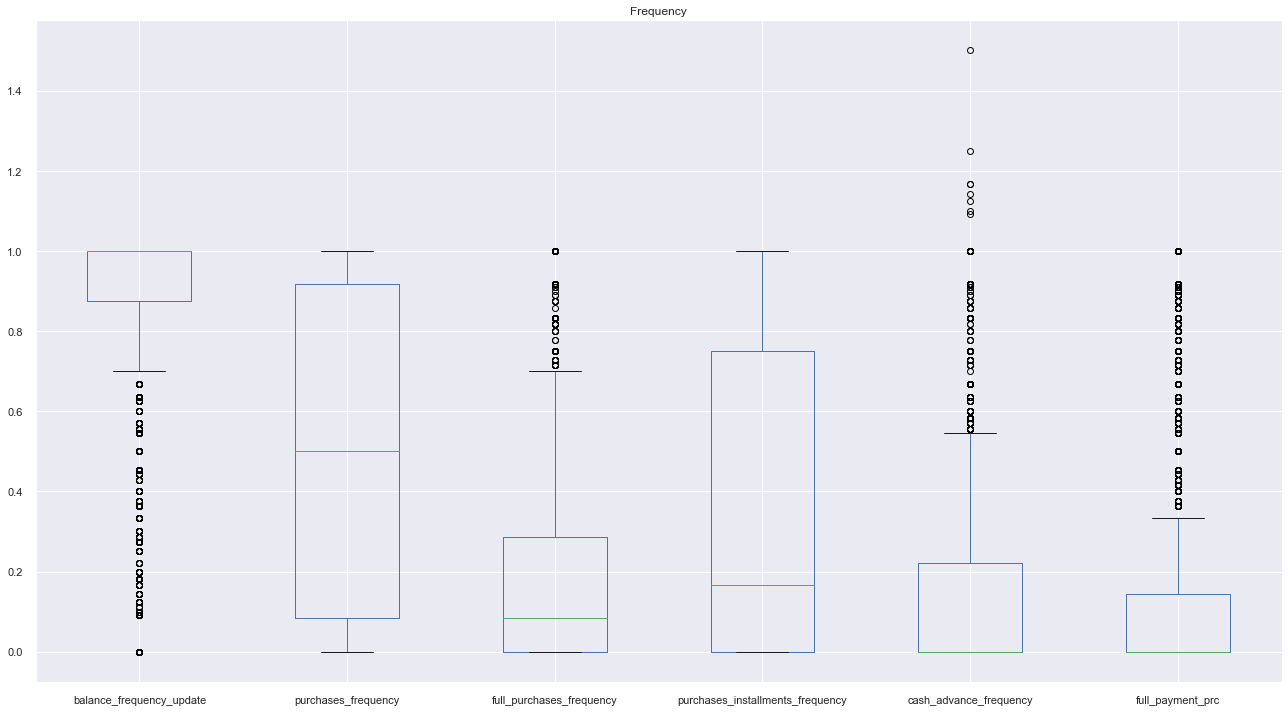

In [458]:
df[['balance_frequency_update',
 'purchases_frequency',
 'full_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
'full_payment_prc']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

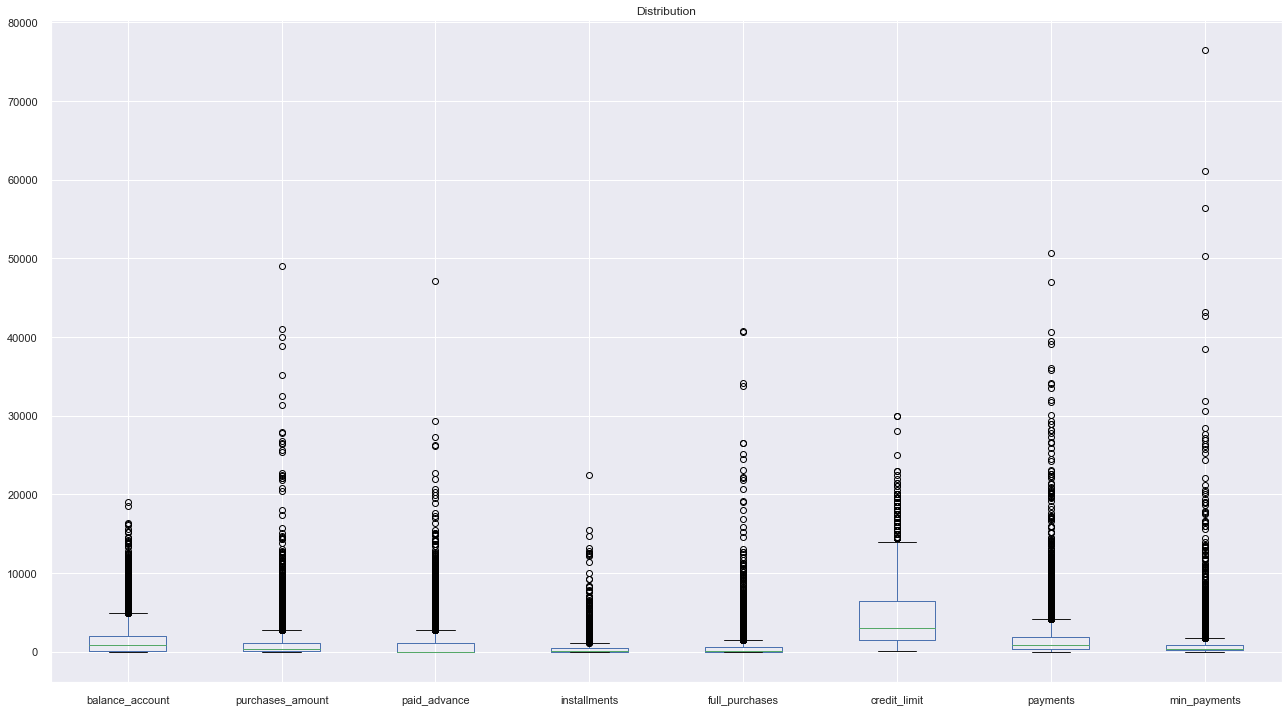

In [459]:
df[['balance_account',
 'purchases_amount',
 'paid_advance',
 'installments',
 'full_purchases',
 'credit_limit',
 'payments',
 'min_payments'
]].plot.box(figsize=(18,10),title='Distribution',legend=True);
plt.tight_layout()

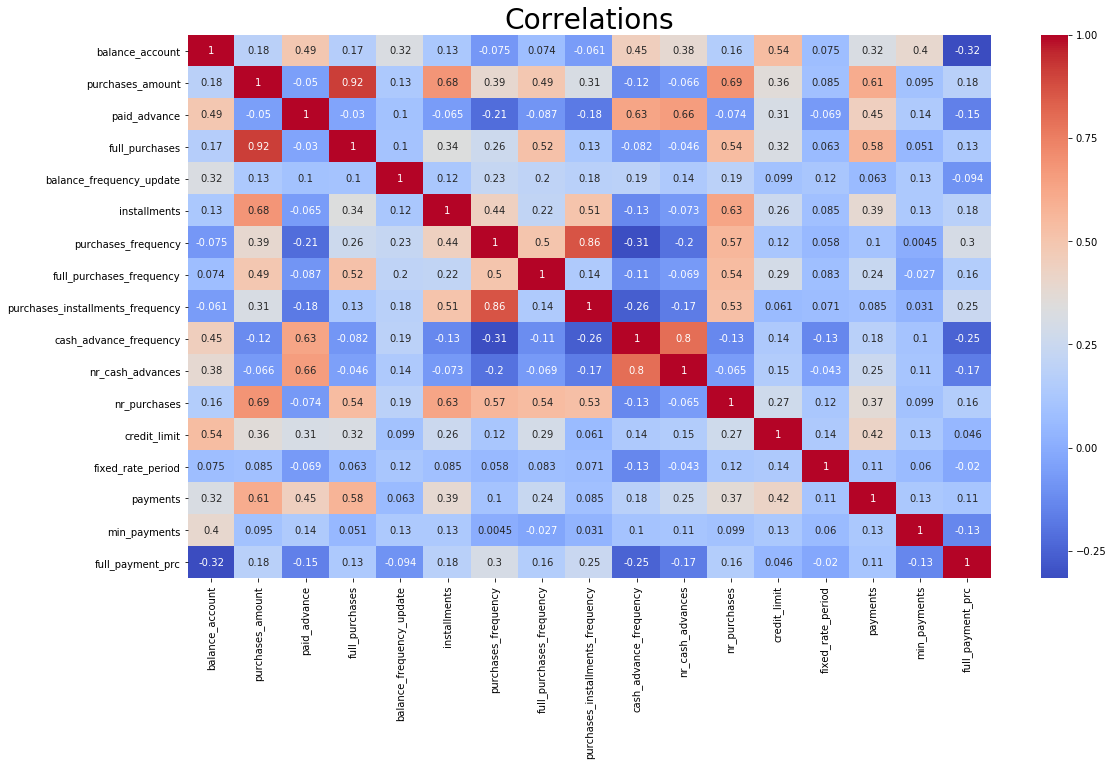

In [40]:
#Lets take a look at how the  variables are correlated
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);
plt.title('Correlations', size = 28);

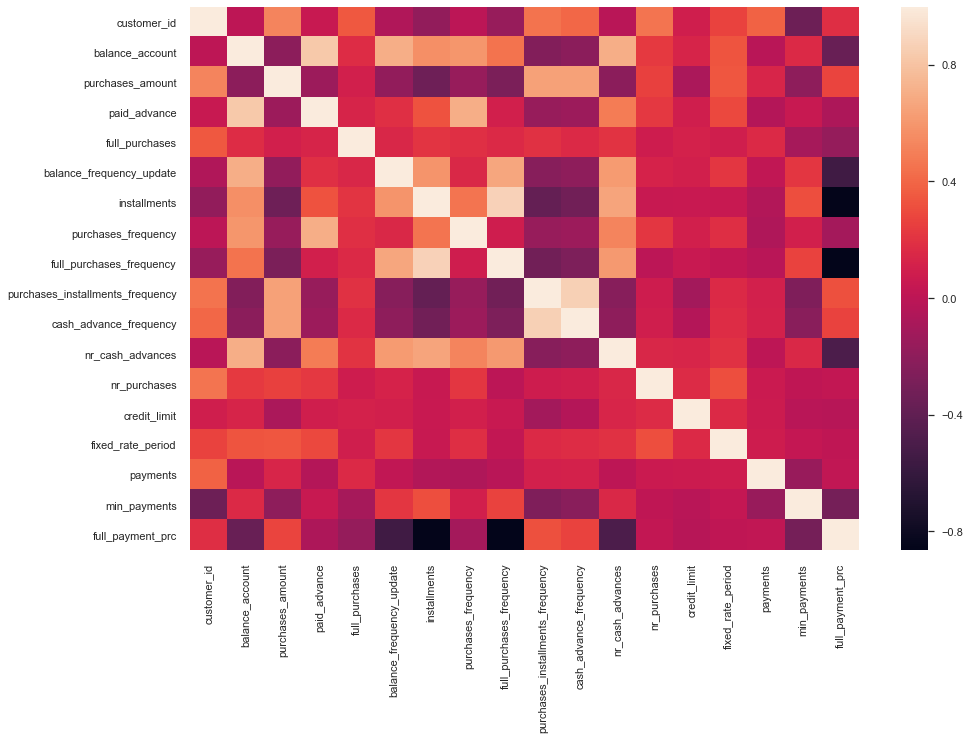

In [349]:
sns.heatmap(df.corr(),
            xticklabels=data.columns,
            yticklabels=data.columns
           )

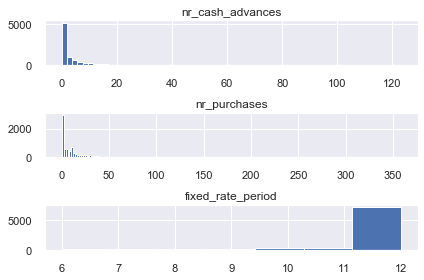

In [460]:
# Distribution of int64 variables
fig, axes = plt.subplots(nrows=3, ncols=1)
ax0, ax1, ax2 = axes.flatten()

ax0.hist(df['nr_cash_advances'], 65, histtype='bar', stacked=True)
ax0.set_title('nr_cash_advances')

ax1.hist(df['nr_purchases'], 173, histtype='bar', stacked=True)
ax1.set_title('nr_purchases')

ax2.hist(df['fixed_rate_period'], 7, histtype='bar', stacked=True)
ax2.set_title('fixed_rate_period')

fig.tight_layout()
plt.show()

### Scaling

In [461]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

In [464]:
df=df.drop(['customer_id'],1)

In [462]:
df.columns

Index(['customer_id', 'balance_account', 'purchases_amount', 'paid_advance',
       'full_purchases', 'balance_frequency_update', 'installments',
       'purchases_frequency', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

In [465]:
sc = MinMaxScaler(feature_range=(0, 1))
df_columns=df.columns
# Fit on the data and transform
df_sc=scaler.fit_transform(df.values)

In [466]:
df_sc = pd.DataFrame(df_sc,columns=df_columns)

In [467]:
df

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
8496,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
8497,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1,0,500.0,9,2437.932505,310.399040,0.000000
8498,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2,51,3000.0,12,462.848132,497.408854,0.000000


### Checking, delete ouliers

In [747]:
IsF = IsolationForest()

In [748]:
 inlier_isf = IsF.fit_predict(df_sc)

In [749]:
inlier_isf

array([1, 1, 1, ..., 1, 1, 1])

In [471]:
df['out']=inlier_isf

In [472]:
df['out'].value_counts()

 1    7733
-1     767
Name: out, dtype: int64

In [473]:
df=df[df['out']==1]

In [474]:
df_sc['out']=inlier_isf

In [477]:
df_sc['out'].value_counts()

 1    7733
-1     767
Name: out, dtype: int64

In [478]:
df_sc=df_sc[df_sc['out']==1]


In [505]:
df_sc = df_sc.drop(['out'],1)

In [506]:
df = df.drop(['out'],1)

In [483]:
# clf_if = IsolationForest(n_estimators = 100, 
                       # max_samples = 200,
                       # contamination = "auto", 
                       # behaviour= "new", 
                       # random_state = 0).fit(df_sc)

In [480]:
# y_pred_if = clf_if.predict(df_sc)

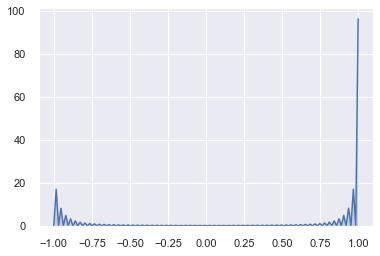

In [484]:
sns.kdeplot(inlier_isf, shade=True)

In [738]:
#fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
#sns.heatmap(df_sc, ax=ax)

### PCA analysis

In [507]:
df_sc.shape

(7733, 17)

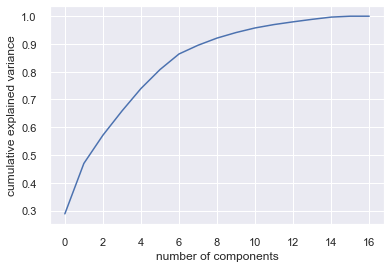

In [509]:
df_sc_pca = PCA(n_components =17).fit(df_sc)
plt.plot(np.cumsum(df_sc_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [510]:
sum(df_sc_pca.explained_variance_ratio_) #100% explained

1.0

In [513]:
var_ratio ={}
for n in range(1,17):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_sc)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [514]:
var_ratio

{1: 0.287974784836414,
 2: 0.4696949489509374,
 3: 0.5711782896119143,
 4: 0.6583082190388732,
 5: 0.7393802015571023,
 6: 0.8075954271541662,
 7: 0.863863315980186,
 8: 0.8953133568872665,
 9: 0.9211815714635293,
 10: 0.9411272459899723,
 11: 0.9577032326777485,
 12: 0.9699198009374531,
 13: 0.9797037845929657,
 14: 0.9887113123806501,
 15: 0.9966995074314641,
 16: 0.9999992604275592}

In [546]:
pc6=PCA(0.8).fit(df_sc) #also "n_components=0.8" would give 80% of variance

In [751]:
features=pc6.fit_transform(df_sc)

In [752]:
features.shape

(7733, 6)

In [753]:
df_f = pd.DataFrame(features)

In [530]:
df_f

,0,1,2,3,4,5
0,-1.549682,-1.085158,1.232007,-0.507648,0.254634,-0.472519
1,-1.050211,-1.285155,3.598176,1.172460,-1.624167,1.036041
2,1.868143,-0.211179,0.607325,-0.401520,-0.672706,-0.517034
3,-1.122523,0.753792,-1.234722,0.654297,-2.174642,-0.465407
4,1.478899,-1.536093,-0.946586,0.315566,0.539176,0.723448
...,...,...,...,...,...,...
7728,1.286619,0.017396,-0.931486,-0.426804,-0.033062,-0.147409
7729,-1.556107,-0.488255,0.866715,-1.329452,-0.002897,-0.059959
7730,1.710638,-3.353031,0.172548,1.622141,0.153137,1.826000
7731,-0.414341,0.918025,-0.823251,0.412549,-1.477478,-0.290717


In [532]:
col = df.columns

In [769]:
df_f.columns=['PC_0','PC_1','PC_2','PC_3','PC_4','PC_5']

In [771]:
df_f['cluster']=clusters

In [772]:
df_f

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,cluster
0,-1.549682,-1.085158,1.232007,-0.507648,0.254634,-0.472519,2
1,-1.050211,-1.285155,3.598176,1.172460,-1.624167,1.036041,2
2,1.868143,-0.211179,0.607325,-0.401520,-0.672706,-0.517034,4
3,-1.122523,0.753792,-1.234722,0.654297,-2.174642,-0.465407,0
4,1.478899,-1.536093,-0.946586,0.315566,0.539176,0.723448,3
...,...,...,...,...,...,...,...
7728,1.286619,0.017396,-0.931486,-0.426804,-0.033062,-0.147409,4
7729,-1.556107,-0.488255,0.866715,-1.329452,-0.002897,-0.059959,2
7730,1.710638,-3.353031,0.172548,1.622141,0.153137,1.826000,3
7731,-0.414341,0.918025,-0.823251,0.412549,-1.477478,-0.290717,0


In [759]:
features6_df.shape

(17, 6)

In [756]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc6.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.287975
PC_1    0.181720
PC_2    0.101483
PC_3    0.087130
PC_4    0.081072
PC_5    0.068215
dtype: float64

### TSNE

In [741]:
n_components = 2
perplexity = 10
palette_cl = sns.color_palette("bright", 8)
palette_if = sns.color_palette("bright", 2)

In [742]:
tsne = TSNE(n_components=n_components, random_state=0, perplexity=perplexity)
X_embedded = tsne.fit_transform(features)

In [743]:
 tsne_df = pd.DataFrame({'X':X_embedded[:,0],
                        'Y':X_embedded[:,1]})

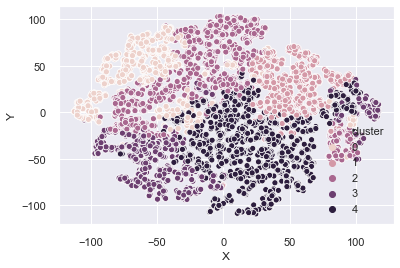

In [744]:
sns.scatterplot(x="X", y="Y", data=tsne_df, hue=df_features["cluster"], legend='full') 

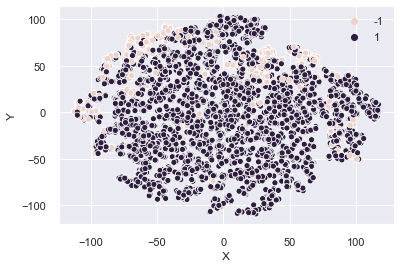

In [750]:
sns.scatterplot(x="X", y="Y", data=tsne_df, hue=inlier_isf, legend='full')#outliers

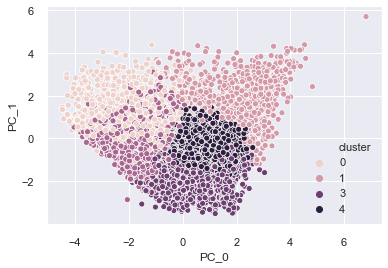

In [773]:
sns.scatterplot('PC_0', 'PC_1',data=df_f, hue='cluster')

### K-Means cluster selection

In [539]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

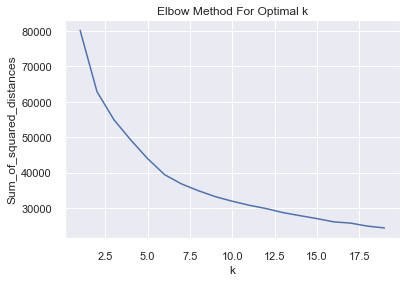

In [538]:
 from scipy.spatial.distance import cdist

X = np.array(df_sc)
Sum_of_squared_distances = []
K = range(1, 20)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

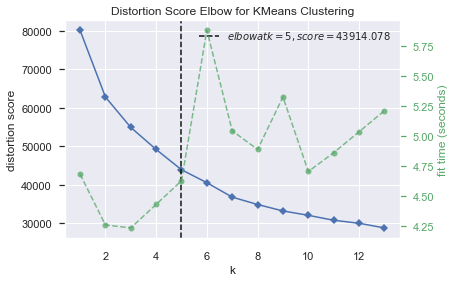

''

In [545]:
# Instantiate the clustering model and visualizer
model = KMeans(
    n_clusters=12,
    init='k-means++',
    n_init=10,
    max_iter=200,
    tol=0.0001,
    precompute_distances='auto',
    verbose=2,
    random_state=None,
    copy_x=True,
    n_jobs=-1,
    algorithm='auto',
)
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(df_sc)        # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure
; 

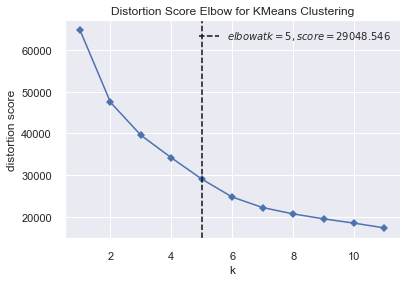

In [544]:
model = KMeans(random_state=0, n_jobs = -1, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(1,12), metric='distortion', timings=False)

# Fit the data and visualize
visualizer.fit(features)    
visualizer.poof()

### K-means

In [681]:
kmeans = KMeans(n_clusters=5).fit(features)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.97361987  1.1870443  -0.81629945  0.88849434 -0.61321965 -0.09171322]
 [ 2.24857416  1.71184027  0.40449953  0.38178574  0.6668138  -0.02262179]
 [-1.64792535 -0.11073961  0.84741138 -0.53259688  0.35086212  0.0465914 ]
 [ 0.44552592 -2.00276412 -0.59668153  0.58632268  0.58931394  0.63078727]
 [ 1.0037469  -0.21135138 -0.15684612 -0.46106203 -0.57425209 -0.30027593]]


In [682]:
clusters = kmeans.predict(features)
clusters

array([2, 2, 4, ..., 3, 0, 0])

In [683]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

score = metrics.silhouette_score (features, clusters, metric='euclidean')
print ("For n_clusters = {}, silhouette score is {})".format('5', score))

For n_clusters = 5, silhouette score is 0.2766957701241323)


In [684]:
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(features)
    scores.append(metrics.silhouette_score(features, km.labels_))

In [685]:
scores

[0.2715699830271071,
 0.240986973997821,
 0.25478992966424346,
 0.27674831819788404,
 0.3003809803451725,
 0.30238297113261714,
 0.3037588397909135,
 0.25664503225863133,
 0.31186734184987597,
 0.270966537652499,
 0.27532927003548446,
 0.2826775356323863,
 0.28556269694407405,
 0.26893499959700407,
 0.26991641568012187,
 0.2698423877067878,
 0.26238326954334945,
 0.25158702856258625,
 0.25581284423165424]

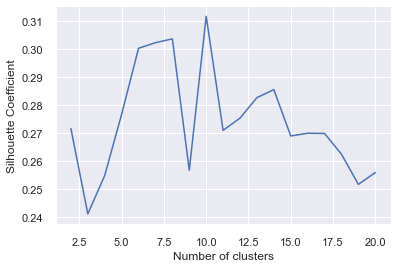

In [686]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
df_features = pd.DataFrame(features)

In [ ]:
df_features['cluster']=clusters

In [689]:
df_features

,0,1,2,3,4,5,cluster
0,-1.549682,-1.085158,1.232007,-0.507648,0.254634,-0.472519,2
1,-1.050211,-1.285155,3.598176,1.172460,-1.624167,1.036041,2
2,1.868143,-0.211179,0.607325,-0.401520,-0.672706,-0.517034,4
3,-1.122523,0.753792,-1.234722,0.654297,-2.174642,-0.465407,0
4,1.478899,-1.536093,-0.946586,0.315566,0.539176,0.723448,3
...,...,...,...,...,...,...,...
7728,1.286619,0.017396,-0.931486,-0.426804,-0.033062,-0.147409,4
7729,-1.556107,-0.488255,0.866715,-1.329452,-0.002897,-0.059959,2
7730,1.710638,-3.353031,0.172548,1.622141,0.153137,1.826000,3
7731,-0.414341,0.918025,-0.823251,0.412549,-1.477478,-0.290717,0


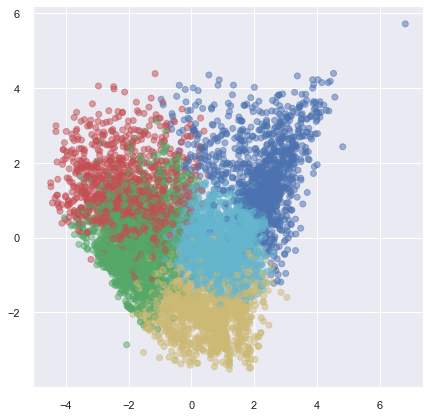

In [691]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'c'}
label_color=[color_map[l] for l in df_features.cluster]
plt.figure(figsize=(7,7))
plt.scatter(features[:,0],features[:,1],c=label_color,cmap='Spectral',alpha=0.5)

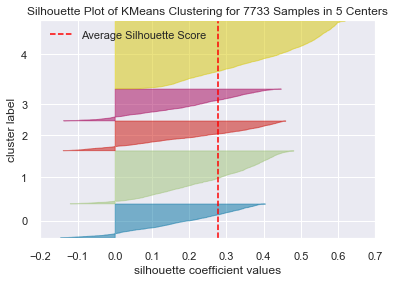

In [692]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()  

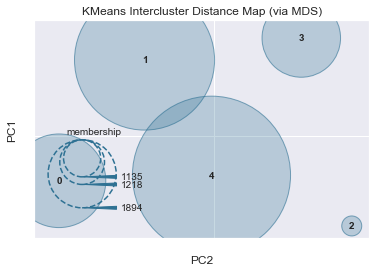

In [693]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

None

In [694]:
df_pair_plot=pd.DataFrame(features,columns=['PC_' +str(i) for i in range(6)])

In [696]:
df_pair_plot['cluster']=clusters

In [697]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,cluster
0,-1.549682,-1.085158,1.232007,-0.507648,0.254634,-0.472519,2
1,-1.050211,-1.285155,3.598176,1.172460,-1.624167,1.036041,2
2,1.868143,-0.211179,0.607325,-0.401520,-0.672706,-0.517034,4
3,-1.122523,0.753792,-1.234722,0.654297,-2.174642,-0.465407,0
4,1.478899,-1.536093,-0.946586,0.315566,0.539176,0.723448,3


C:\Users\ooles\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ooles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


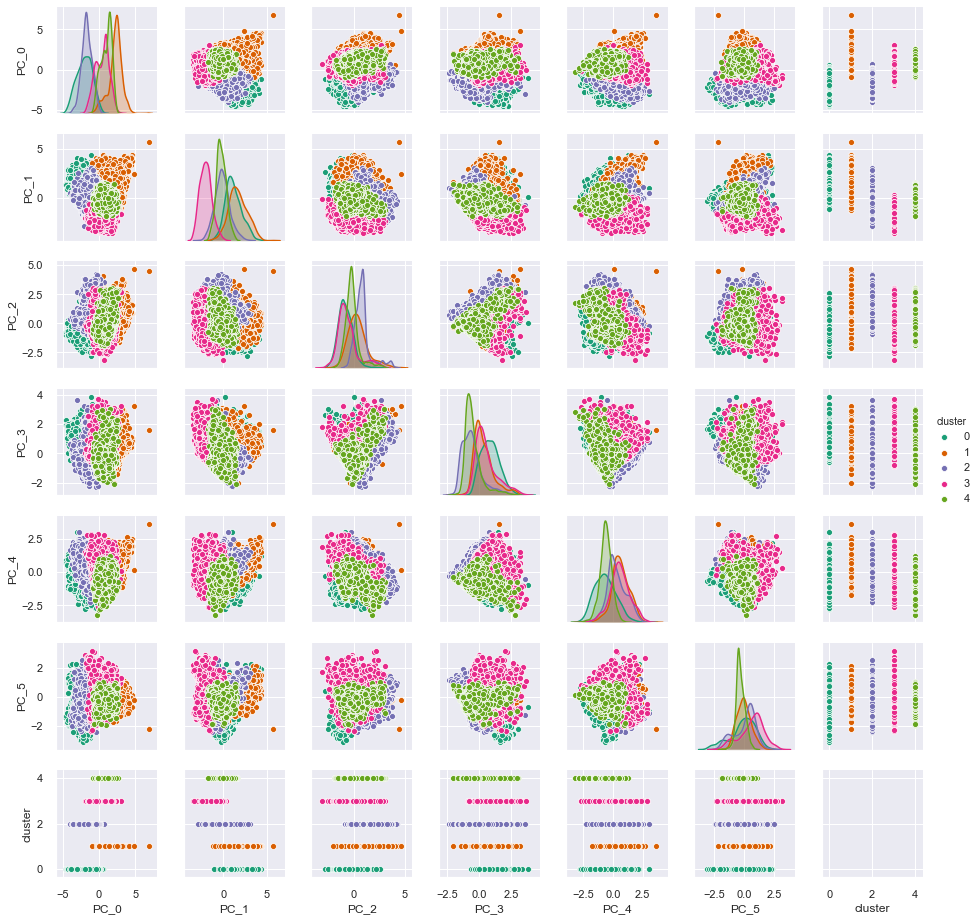

In [698]:
sns.pairplot(df_pair_plot,hue='cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [704]:
df.cluster.value_counts()

4    2426
2    1894
3    1218
0    1135
1    1060
Name: cluster, dtype: int64

In [703]:
df['cluster']=clusters

In [705]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster5=df.groupby('cluster').apply(lambda x: x[df.columns].mean()).T
cluster5

cluster,0,1,2,3,4
balance_account,1504.643499,3800.467417,676.209042,115.839400,1262.799889
purchases_amount,2020.212229,212.266896,846.070982,313.326338,261.962828
paid_advance,253.812649,3171.545440,201.916938,307.360943,551.735015
full_purchases,1413.549586,138.864009,145.715185,189.042947,207.259266
balance_frequency_update,0.977674,0.966800,0.948104,0.380491,0.964856
installments,606.705815,73.498802,700.969989,124.509007,54.887354
purchases_frequency,0.892143,0.159999,0.895324,0.267413,0.168929
full_purchases_frequency,0.711982,0.072284,0.071050,0.073420,0.096553
purchases_installments_frequency,0.517302,0.092586,0.845809,0.183636,0.073150
cash_advance_frequency,0.046346,0.424467,0.040309,0.035530,0.124180


In [706]:
grouped = df.groupby('cluster').mean()

In [707]:
grouped

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
cluster,,,,,,,,,,,,,,,,,
0,1504.643499,2020.212229,253.812649,1413.549586,0.977674,606.705815,0.892143,0.711982,0.517302,0.046346,0.807930,32.719824,6163.796556,11.874890,1953.699959,544.051460,0.202442
1,3800.467417,212.266896,3171.545440,138.864009,0.966800,73.498802,0.159999,0.072284,0.092586,0.424467,10.648113,3.253774,6402.457118,11.421698,2137.020610,1373.918944,0.021798
2,676.209042,846.070982,201.916938,145.715185,0.948104,700.969989,0.895324,0.071050,0.845809,0.040309,0.766631,18.108237,3124.584680,11.472017,975.142657,629.478135,0.273327
3,115.839400,313.326338,307.360943,189.042947,0.380491,124.509007,0.267413,0.073420,0.183636,0.035530,0.680624,4.083744,3635.452472,11.224959,834.926095,172.582235,0.211904
4,1262.799889,261.962828,551.735015,207.259266,0.964856,54.887354,0.168929,0.096553,0.073150,0.124180,2.236603,3.098928,2874.182468,11.631080,861.373709,683.582601,0.022447


In [778]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(df_sc)
    score_c[n]=calinski_harabaz_score(df_sc,km_score.labels_)
    score[n]=silhouette_score(df_sc,km_score.labels_)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function 

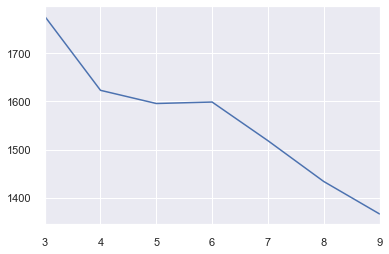

In [781]:
pd.Series(score_c).plot()

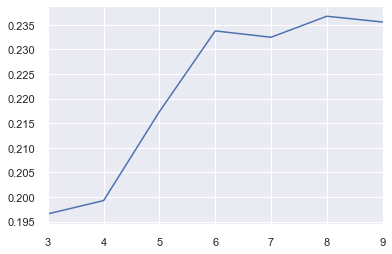

In [780]:
pd.Series(score).plot()

### Final Analysis

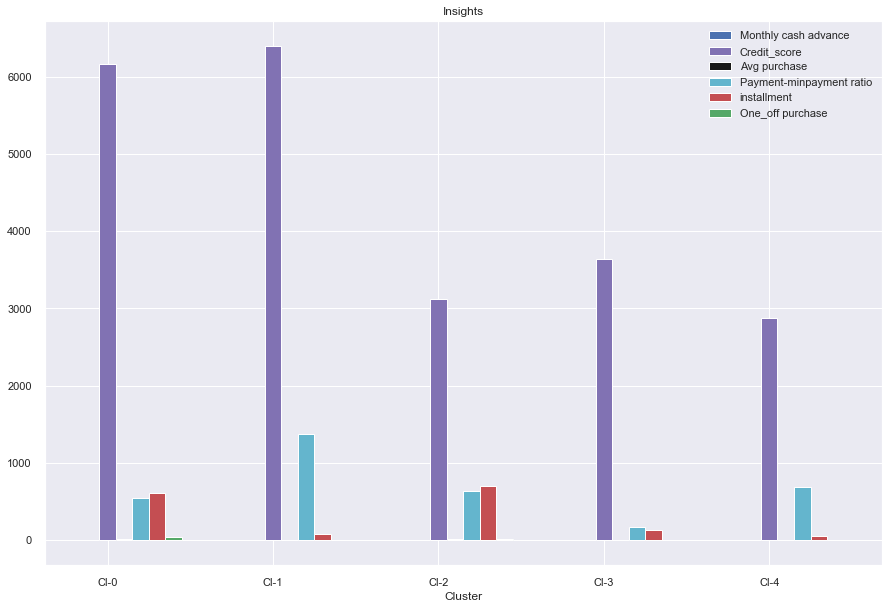

In [774]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster5.columns))

purchases_fr=np.log(cluster5.loc['purchases_frequency',:].values)
credit_score=(cluster5.loc['credit_limit',:].values)
purchase= np.log(cluster5.loc['purchases_amount',:].values)
payment=cluster5.loc['min_payments',:].values
installment=cluster5.loc['installments',:].values
nr_purch=cluster5.loc['nr_purchases',:].values


bar_width=.10
b1=plt.bar(index,purchases_fr,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,nr_purch,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4', 'Cl-5'))
plt.legend()

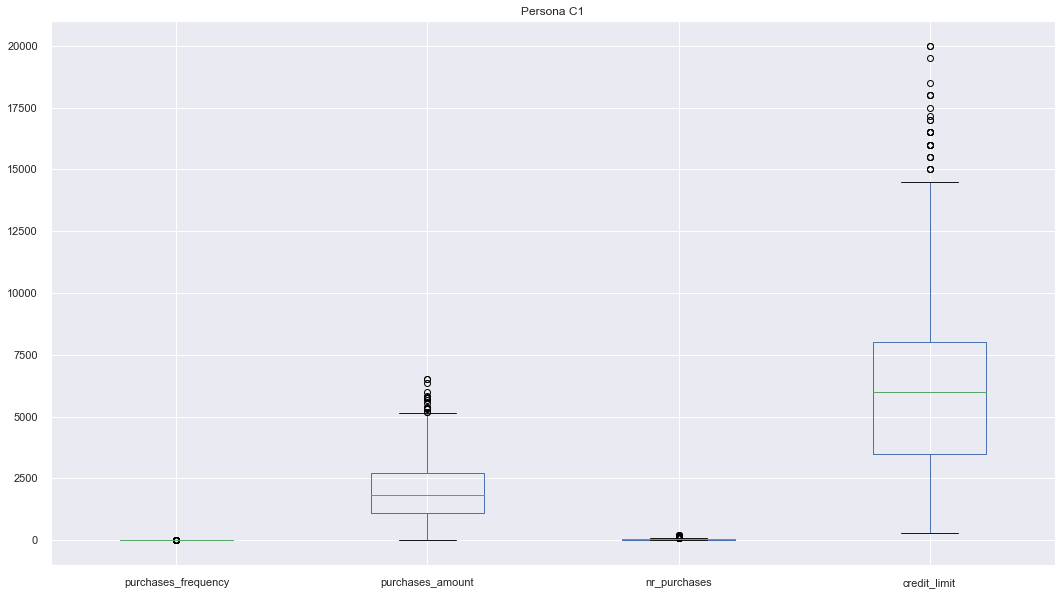

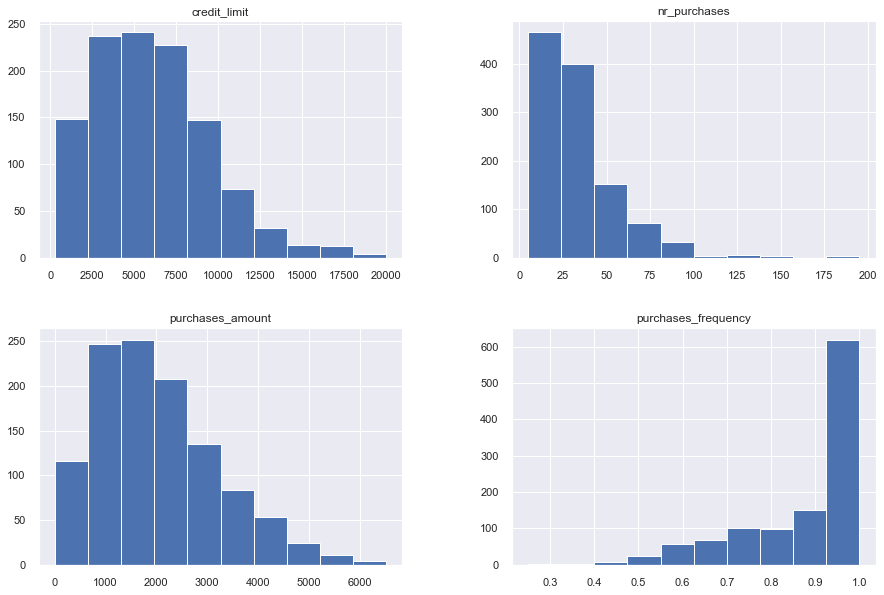

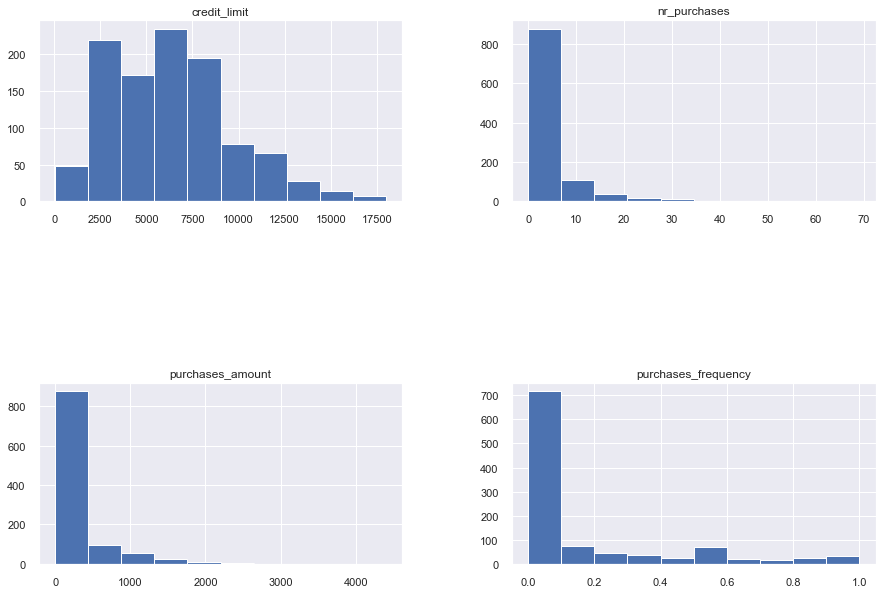

In [777]:
#let´s characterize the Persona in the Cluster C1credit_limit
cluster_C1=df[df['cluster']==0]
cluster_C2=df[df['cluster']==1]
cluster_C1[['purchases_frequency','purchases_amount','nr_purchases','credit_limit']].plot.box(figsize=(18,10),by='cluster',title='Persona C1',legend=True);
plt.subplots_adjust(hspace=1) 
#cluster_C1[['credit_limit','purchases_amount','nr_purchases','purchases_frequency']].plot.hist(figsize=(18,10),title='Persona C1',legend=True);
cluster_C1[['purchases_frequency','purchases_amount','nr_purchases','credit_limit']].hist(figsize = (15,10))
cluster_C2[['purchases_frequency','purchases_amount','nr_purchases','credit_limit']].hist(figsize = (15,10))

plt.subplots_adjust(hspace=1) 
plt.show()

In [666]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(df_sc)
    score_c[n]=calinski_harabaz_score(df_sc,km_score.labels_)
    score[n]=silhouette_score(df_sc,km_score.labels_)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function 

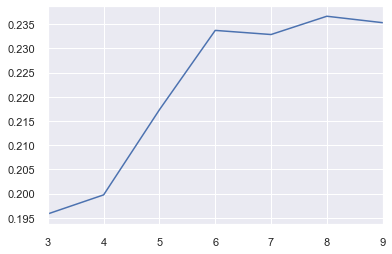

### Cluster error

In [576]:
#Identify cluster Error.

cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(features)
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [577]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,64758.154257
1,2,47465.053645
2,3,39566.720423
3,4,34159.202301
4,5,29048.638787
5,6,24736.561713
6,7,22212.171689
7,8,20695.017920
8,9,19504.253514
9,10,18416.863766


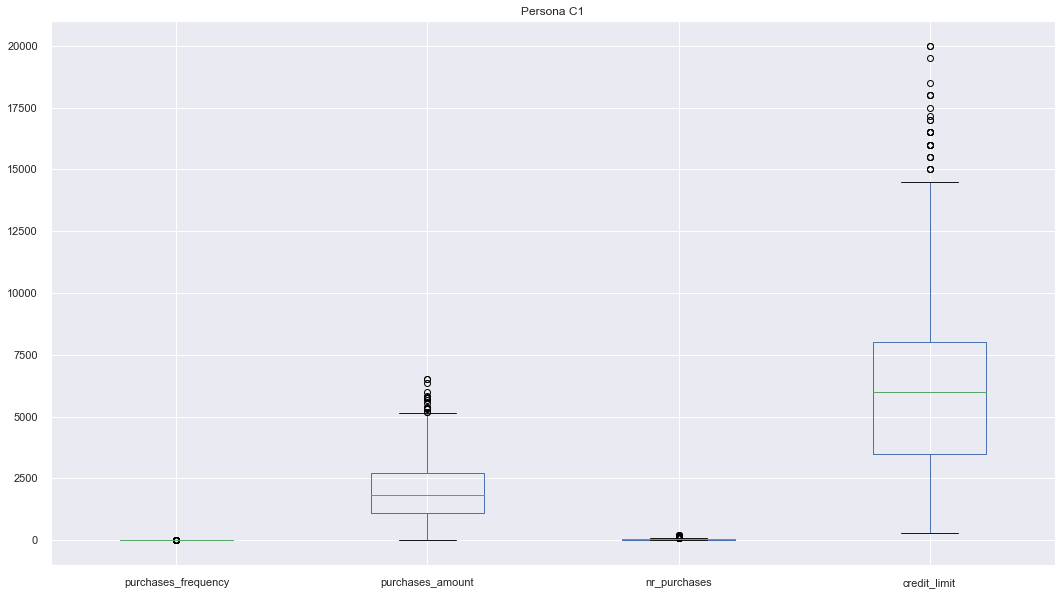

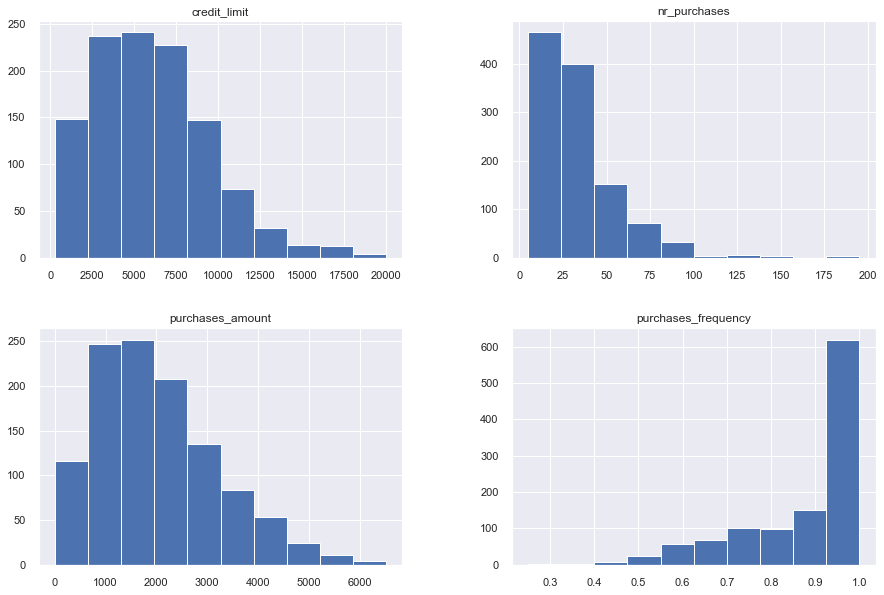

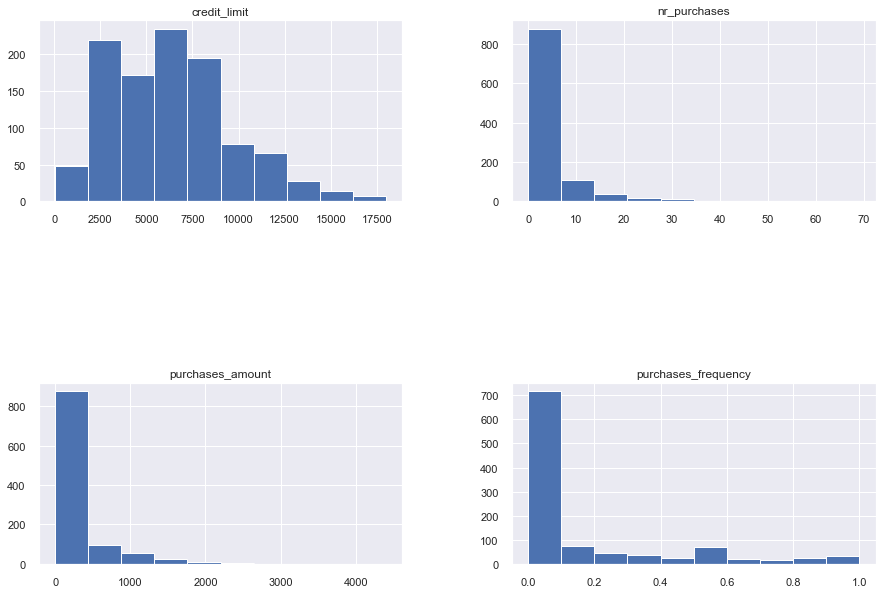